In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Number of unique function names: 11447
functionName
transfer(address _to, uint256 _value)                                                                                                                                                                                                                                                      136739
setApprovalForAll(address operator, bool authorized)                                                                                                                                                                                                                                        94458
approve(address _spender, uint256 _value)                                                                                                                                                                                                                                                   81726
mint(uint256 mintedAmount)                                                    

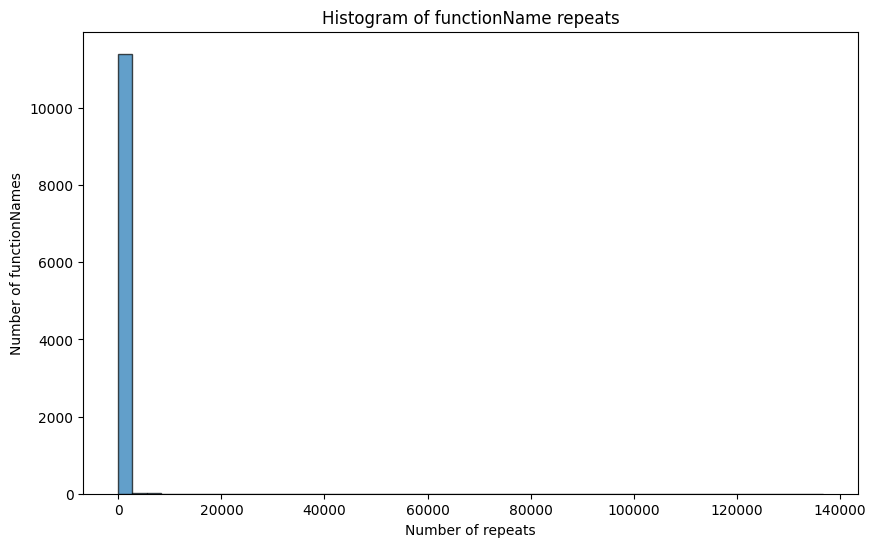

In [5]:


# 1. Load the CSV dataset into a DataFrame using pandas
df = pd.read_csv("dataset/user_transactions.csv")

# 2. Create a DataFrame that shows the number of unique `functionName`
unique_function_names = df['functionName'].nunique()
print(f"Number of unique function names: {unique_function_names}")

# Getting counts of each unique function name
function_name_counts = df['functionName'].value_counts()

# 3. Create a histogram of the number of repeats of each unique `functionName`
plt.figure(figsize=(10,6))
function_name_counts.hist(bins=50, edgecolor="k", alpha=0.7)
plt.title("Histogram of functionName repeats")
plt.xlabel("Number of repeats")
plt.ylabel("Number of functionNames")
plt.grid(False)
plt.show()

############# DISTRIBUTION OVER USER_CONTRACT INTERACTIONS ###############
df = pd.read_parquet('dataset/user_contract_rating.parquet')
print(len(df))

# User interactions histogram
user_interactions = df.groupby('user').size()
plt.hist(user_interactions, bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Interactions by User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# Item interactions histogram
item_interactions = df.groupby('item').size()
item_interactions = item_interactions.sort_values(ascending=False)
print(item_interactions)
print(len(item_interactions))
plt.hist(item_interactions, bins=50, alpha=0.7, color='green')
plt.title('Distribution of Interactions by Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.grid(True)
plt.show()




In [ ]:
########### FUNC NAMES EXPLORATORY ANALYSIS ############

df = pd.read_csv("dataset/user_transactions.csv")
unique_function_names = df['functionName'].nunique()
print(f"Number of unique function names: {unique_function_names}")
function_name_counts = df['functionName'].value_counts()

plt.figure(figsize=(10,6))
function_name_counts.hist(bins=50, edgecolor="k", alpha=0.7)
plt.title("Histogram of functionName repeats")
plt.xlabel("Number of repeats")
plt.ylabel("Number of functionNames")
plt.grid(False)
plt.show()

# Sort the function_name_counts dictionary in descending order
sorted_functions = sorted(function_name_counts.items(), key=lambda x: x[1], reverse=True)
top_10_functions = sorted_functions[:10]
for function_name, count in top_10_functions:
    print(function_name, count)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

contract_interactions = defaultdict(set)
user_interactions = defaultdict(set)
df = pd.read_parquet('dataset/user_contract_rating.parquet')

for index, row in tqdm(df.iterrows(), desc="Reading contracts", dynamic_ncols=True, ascii=True):
    contract_name = row['item']
    user_address = row['user']
    contract_interactions[contract_name].add(user_address)
    user_interactions[user_address].add(contract_name)

################# CONTRACT PAIRS DISTRIBUTION #################
interaction_counts = defaultdict(int)
for user_address, contracts in tqdm(user_interactions.items(), desc="Processing interactions", dynamic_ncols=True, ascii=True):
    for contract1 in contracts:
        for contract2 in contracts:
            if contract1 >= contract2:  # Skip duplicates
                continue
            interaction_counts[(contract1, contract2)] += 1

sorted_counts = sorted(interaction_counts.items(), key=lambda x: x[1], reverse=True)

_, values = zip(*sorted_counts[:50000])
plt.figure(figsize=(15, 10))
plt.bar(range(len(values)), values)
plt.ylim(0, 1500) 
plt.xlabel('Contract Pairs')
plt.ylabel('Number of Interactions')
plt.title('Contract Interactions')
plt.savefig('contracts_pairs_distribution.png', dpi=300)

_, values = zip(*sorted_counts[:50000]) 
plt.figure(figsize=(15, 10))
plt.bar(range(len(values)), values)
plt.yscale('log')
plt.xlabel('Contract Pairs')
plt.ylabel('Number of Interactions (log scale)')
plt.title('Contract Interactions')
plt.savefig('Fig/contracts_pairs_log_distribution.png', dpi=300)


################# CONTRACTS & USERS DISTRIBUTION #################
contract_interaction_counts = {contract: len(users) for contract, users in contract_interactions.items()}
user_interaction_counts = {user: len(contracts) for user, contracts in user_interactions.items()}
sorted_contracts = sorted(contract_interaction_counts.items(), key=lambda x: x[1], reverse=True)
sorted_users = sorted(user_interaction_counts.items(), key=lambda x: x[1], reverse=True)

################# CONTRACTS DISTRIBUTION #################
labels, values = zip(*sorted_contracts)
plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), values, color='b', alpha=0.7, label='Number of Interactions')
plt.yscale('log')  # log scale if the range is large
plt.title('Distribution of User Interactions Over Contracts')
plt.xlabel('Contracts')
plt.ylabel('Number of Interactions (log scale)')
plt.savefig('Fig/contracts_log_distribution.png', dpi=300)

plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), values, color='b', alpha=0.7, label='Number of Interactions')
# plt.yscale('log')  # log scale if the range is large
plt.title('Distribution of User Interactions Over Contracts')
plt.xlabel('Contracts')
plt.ylabel('Number of Interactions')
plt.savefig('Fig/contracts_distribution.png', dpi=300)

################# USERS DISTRIBUTION #################
labels, values = zip(*sorted_users)
plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), values, color='b', alpha=0.7, label='Number of Interactions')
plt.yscale('log')  # log scale if the range is large
plt.title('Distribution of Contract Interactions Over Users')
plt.xlabel('Users')
plt.ylabel('Number of Interactions (log scale)')
plt.savefig('Fig/users_log_distribution.png', dpi=300)

plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), values, color='b', alpha=0.7, label='Number of Interactions')
plt.title('Distribution of Contract Interactions Over Users')
plt.xlabel('Users')
plt.ylabel('Number of Interactions')
plt.savefig('Fig/users_distribution.png', dpi=300)

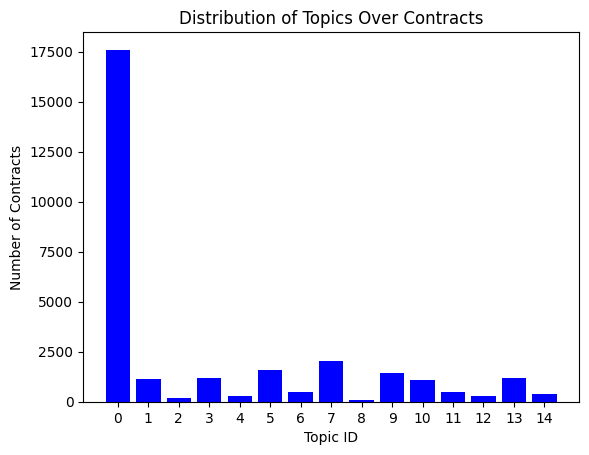

In [5]:
df = pd.read_parquet("dataset/contract_name_topic.parquet")
df_topic_count = df['most_probable_topic'].value_counts().sort_index()

plt.bar(df_topic_count.index, df_topic_count.values, color='blue')
plt.xlabel('Topic ID')
plt.ylabel('Number of Contracts')
plt.title('Distribution of Topics Over Contracts')
plt.xticks(df_topic_count.index)  # To make sure all topic IDs appear on the x-axis
plt.show()

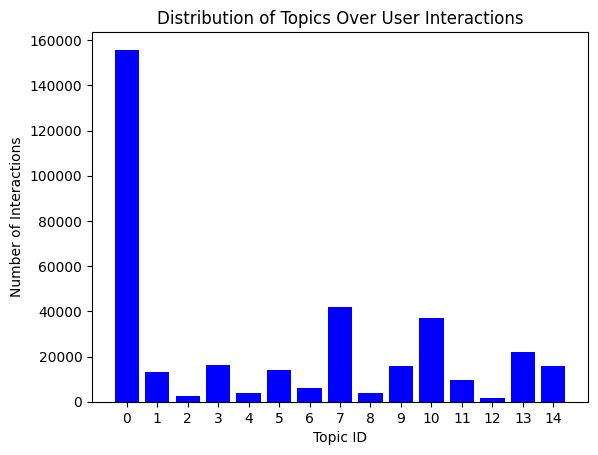

In [3]:
df = pd.read_parquet("dataset/user_topic_rating.parquet")
df_topic_count = df['topic'].value_counts().sort_index()

plt.bar(df_topic_count.index, df_topic_count.values, color='blue')
plt.xlabel('Topic ID')
plt.ylabel('Number of Interactions')
plt.title('Distribution of Topics Over User Interactions')
plt.xticks(df_topic_count.index)  # To make sure all topic IDs appear on the x-axis
plt.show()